/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


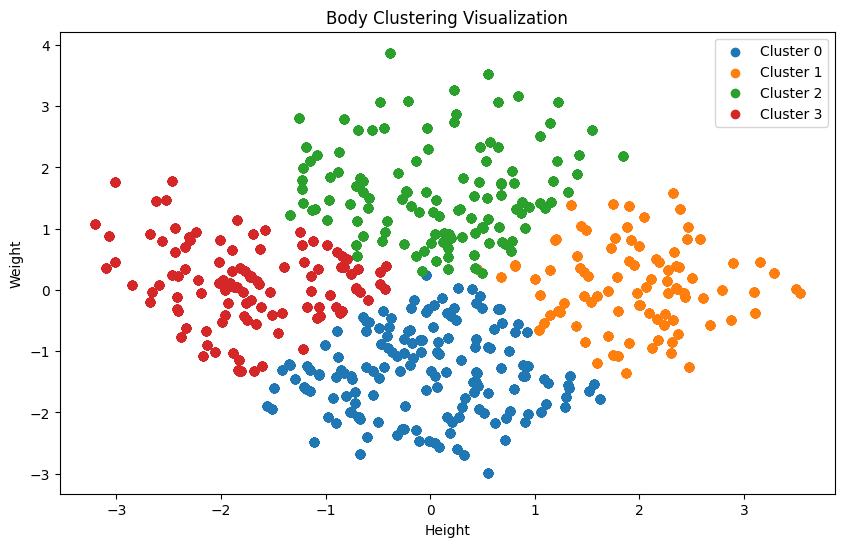

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
# Load your dataset (replace with your actual data file)
df = pd.read_csv("/content/Cleaned_Synthetic_Male_Clothing_Fit_Dataset.csv")

# Apply the conversion function to the Height column
def convert_height_to_cm(height_str):
    feet, inches = height_str.split("'")
    inches = inches.replace('"', '')
    total_inches = int(feet) * 12 + int(inches)
    return total_inches * 2.54  # Convert inches to centimeters

# Update the Height column directly
df['Height'] = df['Height'].apply(convert_height_to_cm)
# df1=pd.read_csv("/content/Generated_Children_Size_Data.csv")
#print(df1)
# Step 2: Feature Standardization
# Specify the relevant features for body measurements clustering
body_measurement_features = ['Height', 'Weight', 'user Bust/Chest', 'user Waist', 'user Hips',]
# df = pd.concat([df1, df3], ignore_index=True, sort=False)
scaler = StandardScaler()
X_body_measurements = scaler.fit_transform(df[body_measurement_features])

# Step 3: Perform KMeans Clustering for body measurements
n_clusters = 4 # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['BodyCluster'] = kmeans.fit_predict(X_body_measurements)

# Step 4: Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_body_measurements)

# Step 5: Visualization of Clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(X_pca[df['BodyCluster'] == cluster, 0], X_pca[df['BodyCluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.title('Body Clustering Visualization')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

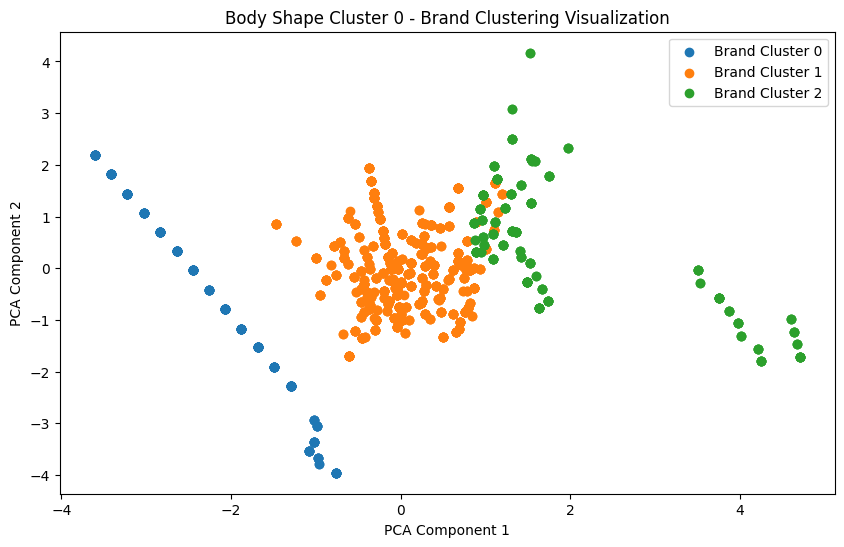

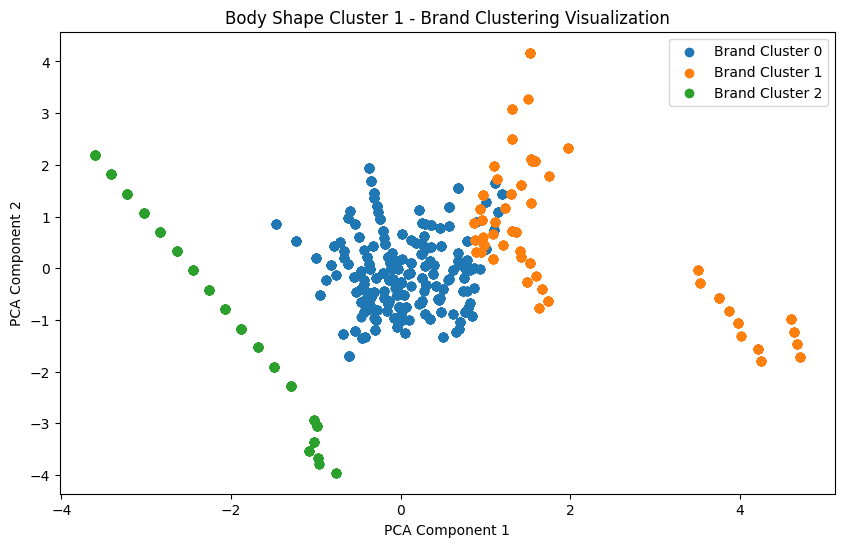

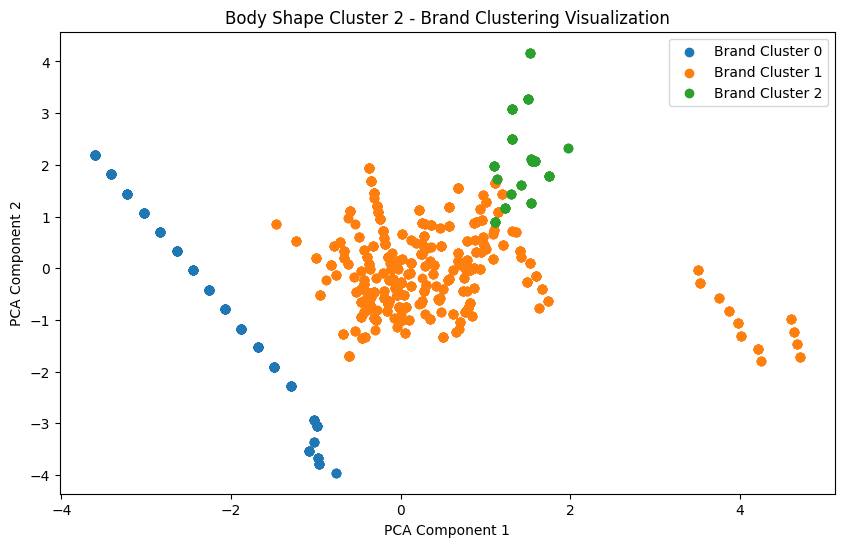

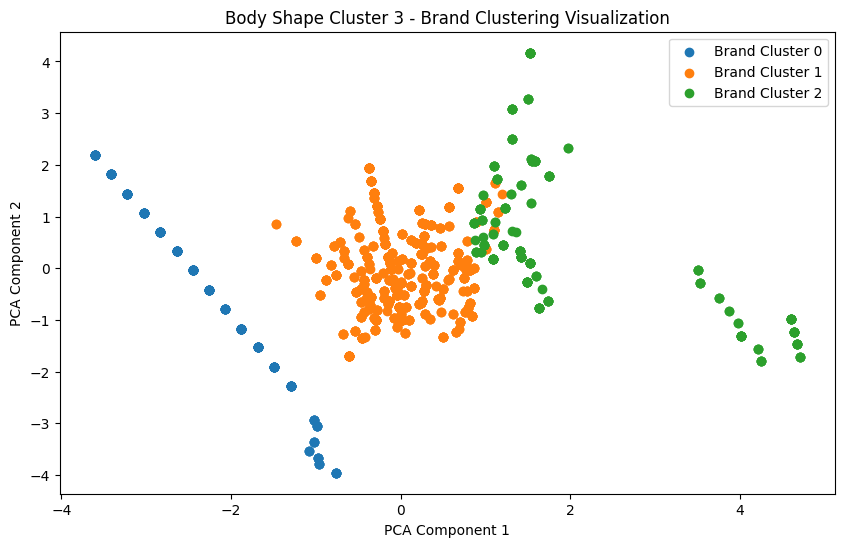

,user_id,Size,BrandWaist,Brand Inseam Length,Brand name,Brand Length,Brand Category,Brand Hip,Brand Chest,Brand Shoulder,...,user Bust/Chest,user Waist,user Hips,user Body Shape Index,Returned(yes/no),Date of purchase,more than one time purchase range(0-5),fit feedback,BodyShapeCluster,BrandCluster
0,79,28,38.00,32,0.0,43.00,0,40,40.00,18.00,...,51,34,35,4,yes,09-06-2024,3,Too Large,2,1.0
1,23,38,37.25,NaN,1.0,29.10,1,40,40.16,17.91,...,41,42,46,1,no,14-01-2024,3,Perfect Fit,1,0.0
2,8,28,36.00,33.4,2.0,33.40,0,40,40.00,18.00,...,37,48,49,3,yes,19-02-2024,1,Perfect Fit,0,1.0
3,311,40,41.75,32,3.0,33.10,3,49,40.00,18.00,...,30,44,48,3,yes,08-01-2024,0,Too Small,0,1.0
4,911,38,NaN,NaN,4.0,26.54,1,40,40.94,17.52,...,32,45,49,3,yes,17-06-2024,1,Perfect Fit,0,2.0


In [ ]:
#Body shape index---brand clustering
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
# Load your dataset (replace with your actual data file path)
df = pd.read_csv("/content/Cleaned_Synthetic_Male_Clothing_Fit_Dataset (2).csv")

# Apply the conversion function to the Height column
def convert_height_to_cm(height_str):
    feet, inches = height_str.split("'")
    inches = inches.replace('"', '')
    total_inches = int(feet) * 12 + int(inches)
    return total_inches * 2.54  # Convert inches to centimeters

# Update the Height column directly
df['Height'] = df['Height'].apply(convert_height_to_cm)

# Step 2: Feature Standardization for Body Shape Index
body_shape_feature = ['user Body Shape Index']
scaler = StandardScaler()
X_body_shape = scaler.fit_transform(df[body_shape_feature])

# Step 3: Perform KMeans Clustering for Body Shape Index
n_clusters_body_shape = 4  # Number of clusters for body shape index
kmeans_body_shape = KMeans(n_clusters=n_clusters_body_shape, random_state=42)
df['BodyShapeCluster'] = kmeans_body_shape.fit_predict(X_body_shape)

# Step 4: Feature Standardization for Brand Category
brand_features = ['BrandWaist', 'Brand Inseam Length', 'Brand Length', 'Brand Hip', 'Brand Chest']
df_brand = df[brand_features].copy()

# Convert brand features to numeric and handle missing values
df_brand = df_brand.apply(pd.to_numeric, errors='coerce')
df_brand.fillna(df_brand.median(), inplace=True)

# Standardize the brand features
X_brand = scaler.fit_transform(df_brand)

# Step 5: Perform KMeans Clustering within each BodyShapeCluster based on Brand Category
n_clusters_brand = 3  # Number of clusters for brand categories within each body shape cluster

# Initialize a column to store the brand category cluster labels
df['BrandCluster'] = np.nan

for body_shape_cluster in range(n_clusters_body_shape):
    # Subset data for each body shape cluster
    cluster_data = X_brand[df['BodyShapeCluster'] == body_shape_cluster]
    if len(cluster_data) > 0:
        # Perform clustering within the body shape cluster
        kmeans_brand = KMeans(n_clusters=n_clusters_brand, random_state=42)
        cluster_labels = kmeans_brand.fit_predict(cluster_data)
        # Store the results in the dataframe
        df.loc[df['BodyShapeCluster'] == body_shape_cluster, 'BrandCluster'] = cluster_labels

# Step 6: Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_brand)

# Step 7: Visualization of Each Body Cluster by Brand Cluster
for body_shape_cluster in range(n_clusters_body_shape):
    plt.figure(figsize=(10, 6))
    cluster_data = df[df['BodyShapeCluster'] == body_shape_cluster]
    X_cluster = X_pca[df['BodyShapeCluster'] == body_shape_cluster]

    for brand_cluster in range(n_clusters_brand):
        plt.scatter(X_cluster[cluster_data['BrandCluster'] == brand_cluster, 0],
                    X_cluster[cluster_data['BrandCluster'] == brand_cluster, 1],
                    label=f'Brand Cluster {brand_cluster}')

    plt.title(f'Body Shape Cluster {body_shape_cluster} - Brand Clustering Visualization')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

# Display the updated dataframe
df.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
# Load your dataset (replace with your actual data file path)
df = pd.read_csv("/content/Cleaned_Synthetic_Male_Clothing_Fit_Dataset (2).csv")

# Apply the conversion function to the Height column
def convert_height_to_cm(height_str):
    feet, inches = height_str.split("'")
    inches = inches.replace('"', '')
    total_inches = int(feet) * 12 + int(inches)
    return total_inches * 2.54  # Convert inches to centimeters

# Update the Height column directly
df['Height'] = df['Height'].apply(convert_height_to_cm)

# Step 2: Feature Standardization for Body Shape Index
# body_shape_feature = ['user Body Shape Index']
# scaler = StandardScaler()
# X_body_shape = scaler.fit_transform(df[body_shape_feature])

# # Step 3: Perform KMeans Clustering for Body Shape Index
# n_clusters_body_shape = 5  # Number of clusters for body shape index
# kmeans_body_shape = KMeans(n_clusters=n_clusters_body_shape, random_state=42)
# df['BodyShapeCluster'] = kmeans_body_shape.fit_predict(X_body_shape)


body_measurement_features = ['Height', 'Weight', 'user Bust/Chest', 'user Waist', 'user Hips', 'user Body Shape Index']

scaler = StandardScaler()
X_body_measurements = scaler.fit_transform(df[body_measurement_features])

# Step 3: Perform KMeans Clustering for body measurements
n_clusters = 4 # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['BodyShapeCluster'] = kmeans.fit_predict(X_body_measurements)
# Step 4: Feature Standardization for Brand Name
brand_name_feature = ['Brand name']
df_brand_name = df[brand_name_feature].copy()

# Convert brand name to numeric using encoding and handle missing values
df_brand_name = df_brand_name.apply(pd.to_numeric, errors='coerce')
df_brand_name.fillna(df_brand_name.median(), inplace=True)

# Standardize the brand name features
X_brand_name = scaler.fit_transform(df_brand_name)

# Step 5: Perform KMeans Clustering within each BodyShapeCluster based on Brand Name
n_clusters_brand_name = 1 # Number of clusters for brand names within each body shape cluster

# Initialize a column to store the brand name cluster labels
df['BrandNameCluster'] = np.nan

for body_shape_cluster in range(n_clusters_body_shape):
    # Subset data for each body shape cluster
    cluster_data = X_brand_name[df['BodyShapeCluster'] == body_shape_cluster]
    if len(cluster_data) > 0:
        # Perform clustering within the body shape cluster
        kmeans_brand_name = KMeans(n_clusters=n_clusters_brand_name, random_state=42)
        cluster_labels = kmeans_brand_name.fit_predict(cluster_data)
        # Store the results in the dataframe
        df.loc[df['BodyShapeCluster'] == body_shape_cluster, 'BrandNameCluster'] = cluster_labels

# Step 6: Feature Standardization for Brand Category
brand_category_features = ['Brand Category']
df_brand_category = df[brand_category_features].copy()

# Convert brand category features to numeric and handle missing values
df_brand_category = df_brand_category.apply(pd.to_numeric, errors='coerce')
df_brand_category.fillna(df_brand_category.median(), inplace=True)

# Standardize the brand category features
X_brand_category = scaler.fit_transform(df_brand_category)

# Step 7: Perform KMeans Clustering within each BrandNameCluster based on Brand Category
n_clusters_brand_category = 10  # Number of clusters for brand categories within each brand name cluster

# Initialize a column to store the brand category cluster labels
df['BrandCategoryCluster'] = np.nan

for body_shape_cluster in range(n_clusters_body_shape):
    for brand_name_cluster in range(n_clusters_brand_name):
        # Subset data for each brand name cluster within the current body shape cluster
        cluster_data = X_brand_category[(df['BodyShapeCluster'] == body_shape_cluster) &
                                        (df['BrandNameCluster'] == brand_name_cluster)]
        if len(cluster_data) > 0:
            # Perform clustering within the brand name cluster
            kmeans_brand_category = KMeans(n_clusters=n_clusters_brand_category, random_state=42)
            cluster_labels = kmeans_brand_category.fit_predict(cluster_data)
            # Store the results in the dataframe
            df.loc[(df['BodyShapeCluster'] == body_shape_cluster) &
                   (df['BrandNameCluster'] == brand_name_cluster), 'BrandCategoryCluster'] = cluster_labels

# Step 8: Feature Standardization for Sizes
size_features = ['Size']
df_size = df[size_features].copy()

# Convert size features to numeric and handle missing values
df_size = df_size.apply(pd.to_numeric, errors='coerce')
df_size.fillna(df_size.median(), inplace=True)

# Standardize the size features
X_size = scaler.fit_transform(df_size)

# Step 9: Perform KMeans Clustering within each BrandCategoryCluster based on Sizes
n_clusters_size = 5  # Number of clusters for sizes within each brand category cluster

# Initialize a column to store the size cluster labels
df['SizeCluster'] = np.nan

for body_shape_cluster in range(n_clusters_body_shape):
    for brand_name_cluster in range(n_clusters_brand_name):
        for brand_category_cluster in range(n_clusters_brand_category):
            # Subset data for each brand category cluster within the current brand name cluster
            cluster_data = X_size[(df['BodyShapeCluster'] == body_shape_cluster) &
                                  (df['BrandNameCluster'] == brand_name_cluster) &
                                  (df['BrandCategoryCluster'] == brand_category_cluster)]
            if len(cluster_data) > 0:
                # Perform clustering within the brand category cluster
                kmeans_size = KMeans(n_clusters=n_clusters_size, random_state=42)
                cluster_labels = kmeans_size.fit_predict(cluster_data)
                # Store the results in the dataframe
                df.loc[(df['BodyShapeCluster'] == body_shape_cluster) &
                       (df['BrandNameCluster'] == brand_name_cluster) &
                       (df['BrandCategoryCluster'] == brand_category_cluster), 'SizeCluster'] = cluster_labels

# Step 10: Visualization of Each Cluster by Size Cluster
for body_shape_cluster in range(n_clusters_body_shape):
    for brand_name_cluster in range(n_clusters_brand_name):
        for brand_category_cluster in range(n_clusters_brand_category):
            plt.figure(figsize=(10, 6))
            cluster_data = df[(df['BodyShapeCluster'] == body_shape_cluster) &
                              (df['BrandNameCluster'] == brand_name_cluster) &
                              (df['BrandCategoryCluster'] == brand_category_cluster)]
            X_cluster = X_size[(df['BodyShapeCluster'] == body_shape_cluster) &
                               (df['BrandNameCluster'] == brand_name_cluster) &
                               (df['BrandCategoryCluster'] == brand_category_cluster)]

            for size_cluster in range(n_clusters_size):
                plt.scatter(cluster_data[cluster_data['SizeCluster'] == size_cluster].index,
                            X_cluster[cluster_data['SizeCluster'] == size_cluster],
                            label=f'Size Cluster {size_cluster}')

            plt.title(f'Body Shape Cluster {body_shape_cluster} - Brand Name Cluster {brand_name_cluster} - Brand Category Cluster {brand_category_cluster} - Size Clustering')
            plt.xlabel('Index')
            plt.ylabel('Standardized Size Feature')
            plt.legend()
            plt.show()

# Display the updated dataframe
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


NameError: name 'n_clusters_body_shape' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load and Prepare Data
file_path = "/content/Cleaned_Synthetic_Male_Clothing_Fit_Dataset (2).csv"
df = pd.read_csv(file_path)

# Filter the dataset to include only records where "Returned" is "yes"
df = df[df['Returned(yes/no)'] == 'no']

# Function to convert height from feet and inches to centimeters
def convert_height_to_cm(height_str):
    feet, inches = height_str.split("'")
    inches = inches.replace('"', '')
    total_inches = int(feet) * 12 + int(inches)
    return total_inches * 2.54  # Convert inches to centimeters

# Apply conversion function
df['Height'] = df['Height'].apply(convert_height_to_cm)

# Step 2: Feature Standardization for relevant attributes
relevant_features = ['Height', 'Weight', 'user Bust/Chest', 'user Waist', 'user Hips', 'user Body Shape Index']
scaler = StandardScaler()
X_relevant = scaler.fit_transform(df[relevant_features])

# Step 3: Perform KMeans Clustering for Body Shape Index
n_clusters_body_shape = 4
kmeans_body_shape = KMeans(n_clusters=n_clusters_body_shape, random_state=42)
df['BodyShapeCluster'] = kmeans_body_shape.fit_predict(X_relevant[:, -1].reshape(-1, 1))  # Clustering on 'user Body Shape Index'

# Step 4: Feature Standardization for Brand Name
brand_name_feature = ['Brand name']
df_brand_name = df[brand_name_feature].copy()
df_brand_name = df_brand_name.apply(pd.to_numeric, errors='coerce')
df_brand_name.fillna(df_brand_name.median(), inplace=True)
X_brand_name = scaler.fit_transform(df_brand_name)

# Step 5: Perform KMeans Clustering within each BodyShapeCluster based on Brand Name
n_clusters_brand_name = 10
df['BrandNameCluster'] = np.nan

for body_shape_cluster in range(n_clusters_body_shape):
    cluster_data = X_brand_name[df['BodyShapeCluster'] == body_shape_cluster]
    if len(cluster_data) > 0:
        kmeans_brand_name = KMeans(n_clusters=n_clusters_brand_name, random_state=42)
        cluster_labels = kmeans_brand_name.fit_predict(cluster_data)
        df.loc[df['BodyShapeCluster'] == body_shape_cluster, 'BrandNameCluster'] = cluster_labels

# Step 6: Feature Standardization for Brand Category
brand_category_features = ['Brand Category']
df_brand_category = df[brand_category_features].copy()
df_brand_category = df_brand_category.apply(pd.to_numeric, errors='coerce')
df_brand_category.fillna(df_brand_category.median(), inplace=True)
X_brand_category = scaler.fit_transform(df_brand_category)

# Step 7: Perform KMeans Clustering within each BrandNameCluster based on Brand Category
n_clusters_brand_category = 3
df['BrandCategoryCluster'] = np.nan

for body_shape_cluster in range(n_clusters_body_shape):
    for brand_name_cluster in range(n_clusters_brand_name):
        cluster_data = X_brand_category[(df['BodyShapeCluster'] == body_shape_cluster) &
                                        (df['BrandNameCluster'] == brand_name_cluster)]
        if len(cluster_data) > 0:
            kmeans_brand_category = KMeans(n_clusters=n_clusters_brand_category, random_state=42)
            cluster_labels = kmeans_brand_category.fit_predict(cluster_data)
            df.loc[(df['BodyShapeCluster'] == body_shape_cluster) &
                   (df['BrandNameCluster'] == brand_name_cluster), 'BrandCategoryCluster'] = cluster_labels

# Step 8: Feature Standardization for Sizes
size_features = ['Size']
df_size = df[size_features].copy()
df_size = df_size.apply(pd.to_numeric, errors='coerce')
df_size.fillna(df_size.median(), inplace=True)
X_size = scaler.fit_transform(df_size)

# Step 9: Perform KMeans Clustering within each BrandCategoryCluster based on Sizes
n_clusters_size = 5
df['SizeCluster'] = np.nan

for body_shape_cluster in range(n_clusters_body_shape):
    for brand_name_cluster in range(n_clusters_brand_name):
        for brand_category_cluster in range(n_clusters_brand_category):
            cluster_data = X_size[(df['BodyShapeCluster'] == body_shape_cluster) &
                                  (df['BrandNameCluster'] == brand_name_cluster) &
                                  (df['BrandCategoryCluster'] == brand_category_cluster)]
            if len(cluster_data) > 0:
                kmeans_size = KMeans(n_clusters=n_clusters_size, random_state=42)
                cluster_labels = kmeans_size.fit_predict(cluster_data)
                df.loc[(df['BodyShapeCluster'] == body_shape_cluster) &
                       (df['BrandNameCluster'] == brand_name_cluster) &
                       (df['BrandCategoryCluster'] == brand_category_cluster), 'SizeCluster'] = cluster_labels

output_columns = ['Height', 'Weight', 'user Bust/Chest', 'user Waist', 'user Hips',
                  'user Body Shape Index', 'Brand name', 'Brand Category', 'Size',
                  'BodyShapeCluster', 'BrandNameCluster', 'BrandCategoryCluster', 'SizeCluster']

# Save the DataFrame with the selected columns to a new CSV file
output_file_path = "/content/New_Clothing_Fit_Dataset.csv"
df[output_columns].to_csv(output_file_path, index=False)

print(f"Clustered data has been saved to {output_file_path}")
# Step 10: Generate Size Charts for Each Brand Category
attributes = ['Height', 'Weight', 'user Bust/Chest', 'user Waist', 'user Hips']
size_charts = {}

for brand_name_cluster in range(n_clusters_brand_name):
    for brand_category_cluster in range(n_clusters_brand_category):
        subset = df[(df['BrandNameCluster'] == brand_name_cluster) &
                    (df['BrandCategoryCluster'] == brand_category_cluster)]
        if not subset.empty:
            size_chart = subset.groupby('Size')[attributes].mean()
            size_charts[f'BrandNameCluster_{brand_name_cluster}BrandCategoryCluster{brand_category_cluster}'] = size_chart

# Display the size charts
size_charts

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Clustered data has been saved to /content/New_Clothing_Fit_Dataset.csv


{'BrandNameCluster_0BrandCategoryCluster0':           Height     Weight  user Bust/Chest  user Waist  user Hips
 Size                                                               
 26    180.340000  74.000000        46.000000   34.000000  39.000000
 28    172.784713  74.242038        38.955414   36.968153  41.617834
 30    180.975000  75.000000        44.500000   39.250000  44.500000
 32    177.800000  74.200000        45.400000   36.600000  40.600000
 34    176.711429  73.428571        42.714286   38.000000  41.714286
 36    180.975000  77.500000        37.000000   37.500000  40.500000
 38    163.068000  63.800000        42.400000   38.000000  44.000000
 40    165.100000  63.000000        50.000000   28.000000  32.000000
 42    165.100000  50.500000        40.000000   29.000000  32.500000
 44    161.290000  65.500000        39.500000   35.000000  39.000000,
 'BrandNameCluster_0BrandCategoryCluster1':           Height     Weight  user Bust/Chest  user Waist  user Hips
 Size           